In [1]:
import numpy as np
import h5py
import time
import sys
from dataclasses import dataclass
import matplotlib.pyplot as plt

from src.emrikludge.orbits.nk_geodesic_orbit import BabakNKOrbit
from src.emrikludge.waveforms.nk_waveform import compute_nk_waveform, ObserverInfo

[NK Mapping] C++ extension loaded successfully. Acceleration ON 🚀


[Plot] Saved Chunked_Result.png


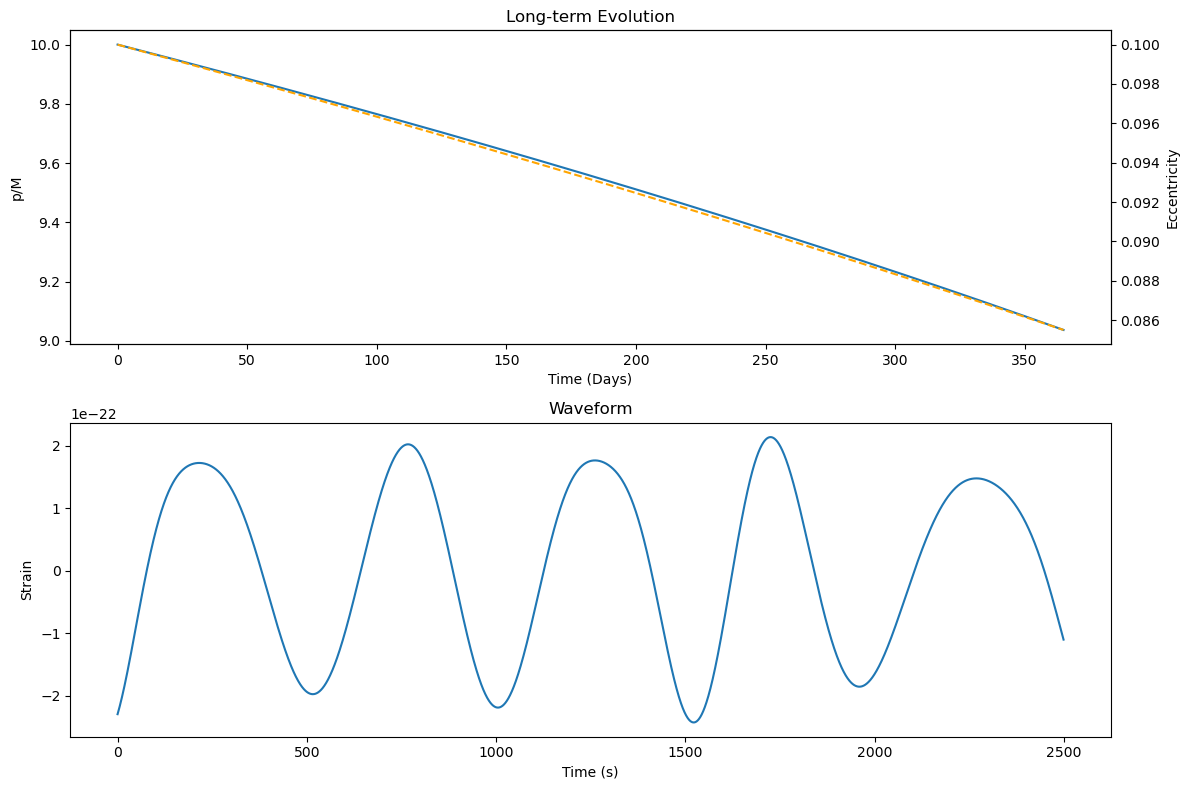

In [3]:
filename = "emri_waveform_complete.h5"
M_BH_SOLAR = 1e6
mu_OBJ_SOLAR = 10.0
G_SI = 6.67430e-11
C_SI = 299792458.0
M_SUN_SI = 1.989e30
SEC_PER_YEAR = 31536000.0

M_phys_solar = 1e6
mu_phys_solar = 10.0
a_spin = 0.7
p_init, e_init, iota_init = 10.0, 0.6, np.radians(30.0)

M_kg = M_phys_solar * M_SUN_SI
T_unit_sec = G_SI * M_kg / (C_SI**3)

target_years = 1.0
target_sec = target_years * SEC_PER_YEAR
total_duration_M = target_sec / T_unit_sec
with h5py.File(filename, 'r') as f:
    t = f['t']
    p = f['p']
    e = f['e']
    
    total = t.shape[0]
    

    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    
    # Downsample for plotting
    step = max(1, total // 2000)
    t_days = np.array(t[::step]) * T_unit_sec / 86400.0
    
    axes[0].plot(t_days, p[::step], label='p')
    axes[0].set_ylabel('p/M')
    axes[0].set_xlabel('Time (Days)')
    axes[0].set_title("Long-term Evolution")
    ax0r = axes[0].twinx()
    ax0r.plot(t_days, e[::step], color='orange', label='e', linestyle='--')
    ax0r.set_ylabel('Eccentricity')
    
    # Plot waveform if exists
    if 'h_plus' in f:
        h = f['h_plus']
        #view_len =h.shape[0]
        view_len=5000
        #start = max(0, h.shape[0] - view_len)
        start=0
        t_wave = np.array(t[start:start+view_len]) * T_unit_sec
        h_wave = np.array(h[start:start+view_len])
        
        if len(h_wave) > 0:
            axes[1].plot(t_wave - t_wave[0], h_wave)
            axes[1].set_ylabel("Strain")
            axes[1].set_xlabel("Time (s)")
            axes[1].set_title("Waveform")
    
    plt.tight_layout()
    plt.savefig("Chunked_Result.png")
    print("[Plot] Saved Chunked_Result.png")